<div style="text-align:center">    
   <img style="display: inline; vertical-align: top; padding-right: 2rem; padding-top: 0.5rem; width: 250px; height: auto;" src="https://ceos.org/document_management/Communications/CEOS-Logos/CEOS_logo_colour_no_text-small.png" />
    <img style="display: inline; vertical-align: top; padding-right: 2rem; padding-top: 0.7rem; width: 250px; height: auto;" src="https://static.wixstatic.com/media/f9d4ea_7101964643434c0f82860943287b276a~mv2.png/v1/crop/x_0,y_0,w_1275,h_449/fill/w_287,h_99,al_c,q_85,usm_0.66_1.00_0.01,enc_auto/f9d4ea_7101964643434c0f82860943287b276a~mv2.png" />
</div>
<h2 style="text-align:center; color: #172751; margin-top:2rem">Exploring Sentinel-2 Imagery in Binder with ODC-STAC</h2>
<h3 style="text-align:center; color: #a6ce37; margin-bottom:1.4rem">Open Data Cube</h3>


This notebook demonstrates how to run and utilize odc-stac within a Binder-ready
GitHub repository. It showcases how to seamlessly access and analyze geospatial
data using Open Data Cube STAC `odc-stac` in an interactive, cloud-based
environment.


### Import Packages


In [1]:
import odc.stac
import pystac_client
import planetary_computer

### Configurable Analysis Variables


Define analysis date, area of interest (AOI), and search parameters.


In [2]:
analysis_date = "2021-11-20"
aoi_bbox = (15.1, -23.3, 15.4, -23.0)

stac_search_kwargs = {
    "collections": "sentinel-2-l2a",
    "datetime": analysis_date,
    "bbox": aoi_bbox,
}

odc_stac_load_kwargs = {
    "bbox": aoi_bbox,
    "bands": ("red", "green", "blue"),
    "chunks": {},
    "groupby": "solar_day",
}

planetary_stac_catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

items = planetary_stac_catalog.search(
    **stac_search_kwargs,
).item_collection()
items

odc_stac_xr_ds = odc.stac.load(
    items,
    **odc_stac_load_kwargs,
)

odc_stac_xr_ds

<xarray.Dataset> Size: 10kB
Dimensions:      (y: 29, x: 27, time: 1)
Coordinates:
  * y            (y) float64 232B 7.444e+06 7.444e+06 ... 7.444e+06 7.444e+06
  * x            (x) float64 216B 5.268e+05 5.268e+05 ... 5.27e+05 5.27e+05
    spatial_ref  int32 4B 32733
  * time         (time) datetime64[ns] 8B 2021-11-20T08:51:49.024000
Data variables:
    red          (time, y, x) float32 3kB dask.array<chunksize=(1, 29, 27), meta=np.ndarray>
    green        (time, y, x) float32 3kB dask.array<chunksize=(1, 29, 27), meta=np.ndarray>
    blue         (time, y, x) float32 3kB dask.array<chunksize=(1, 29, 27), meta=np.ndarray>

### Visualize Sentinel-2 Band Data


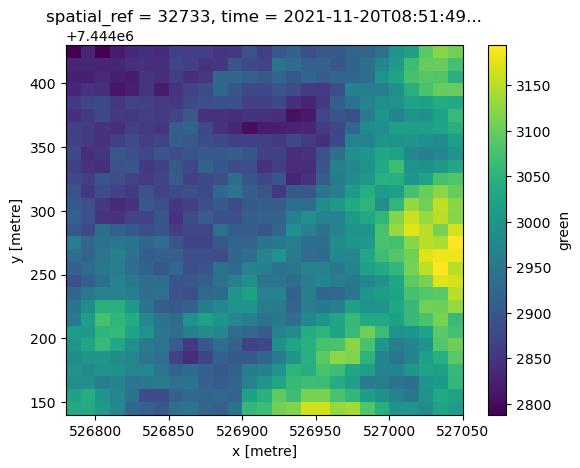

In [3]:
odc_stac_xr_ds["green"].plot(figsize=(15,10))